In [1]:
import pandas as pd
data=pd.read_csv("glassdoor_reviews.csv")

In [2]:
data.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


In [3]:
df=data[["firm","work_life_balance","culture_values","career_opp","senior_mgmt","overall_rating","headline","pros","cons"]]

In [4]:
df.head()

,firm,work_life_balance,culture_values,career_opp,senior_mgmt,overall_rating,headline,pros,cons
0,AFH-Wealth-Management,4.0,3.0,2.0,3.0,2,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,3.0,1.0,2.0,4.0,2,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,1.0,1.0,1.0,1.0,1,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2.0,3.0,2.0,3.0,5,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2.0,1.0,2.0,1.0,1,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


In [5]:
df.shape

(838566, 9)

In [6]:
df.isnull().sum()

firm                      0
work_life_balance    149894
culture_values       191373
career_opp           147501
senior_mgmt          155876
overall_rating            0
headline               2219
pros                      0
cons                      8
dtype: int64

In [7]:
df.dropna(subset=["headline","cons"],inplace=True)

C:\Users\SAJJAD-PC\AppData\Local\Temp\ipykernel_17596\3430318014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["headline","cons"],inplace=True)


In [8]:
for col in ['work_life_balance', 'culture_values', 'career_opp', 'senior_mgmt']:
    df[col].fillna(df.groupby("firm")[col].transform("mean"), inplace=True)

C:\Users\SAJJAD-PC\AppData\Local\Temp\ipykernel_17596\1129407246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df.groupby("firm")[col].transform("mean"), inplace=True)
C:\Users\SAJJAD-PC\AppData\Local\Temp\ipykernel_17596\1129407246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df.groupby("firm")[col].transform("mean"), inplace=True)
C:\Users\SAJJAD-PC\AppData\Local\Temp\ipykernel_17596\1129407246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [9]:
df

,firm,work_life_balance,culture_values,career_opp,senior_mgmt,overall_rating,headline,pros,cons
0,AFH-Wealth-Management,4.000000,3.000000,2.000000,3.000000,2,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,3.000000,1.000000,2.000000,4.000000,2,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,1.000000,1.000000,1.000000,1.000000,1,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2.000000,3.000000,2.000000,3.000000,5,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2.000000,1.000000,2.000000,1.000000,1,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."
...,...,...,...,...,...,...,...,...,...
838561,the-LEGO-Group,4.000000,5.000000,4.000000,4.000000,5,Just an awesome company to work for!!!,"Great company values, awesome product, smart c...",Not very easy to transfer to other locations
838562,the-LEGO-Group,3.965706,4.294366,3.240715,3.460472,3,working at lego,staff discount is really nice,micro managing is a hassle\r\ncan become menta...
838563,the-LEGO-Group,5.000000,5.000000,3.000000,3.000000,4,not interested in growing their people,loved brand for a lot of people,you can spend 6-10 years without any promotion...
838564,the-LEGO-Group,3.965706,4.294366,3.240715,3.460472,5,Great Place to Work,"Good wages, good hours, lots of resources","Working every other weekend, busy seasons can ..."


In [10]:
df.isnull().sum()

firm                 0
work_life_balance    0
culture_values       0
career_opp           0
senior_mgmt          0
overall_rating       0
headline             0
pros                 0
cons                 0
dtype: int64

In [11]:
df["review"]=df["headline"]+df["pros"]+["cons"]
df.head()

C:\Users\SAJJAD-PC\AppData\Local\Temp\ipykernel_17596\1648862371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"]=df["headline"]+df["pros"]+["cons"]


,firm,work_life_balance,culture_values,career_opp,senior_mgmt,overall_rating,headline,pros,cons,review
0,AFH-Wealth-Management,4.0,3.0,2.0,3.0,2,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication.","Young colleagues, poor micro managementVery fr..."
1,AFH-Wealth-Management,3.0,1.0,2.0,4.0,2,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...,"Excellent staff, poor salaryFriendly, helpful ..."
2,AFH-Wealth-Management,1.0,1.0,1.0,1.0,1,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very...","Low salary, bad micromanagementEasy to get the..."
3,AFH-Wealth-Management,2.0,3.0,2.0,3.0,5,Over promised under delivered,Nice staff to work with,No career progression and salary is poor,Over promised under deliveredNice staff to wor...
4,AFH-Wealth-Management,2.0,1.0,2.0,1.0,1,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr...","client reporting adminEasy to get the job, Nic..."


In [12]:
df_grouped = df[["firm","work_life_balance","culture_values","career_opp","senior_mgmt","overall_rating"]].groupby('firm').mean()

In [13]:
df_grouped.head()

,work_life_balance,culture_values,career_opp,senior_mgmt,overall_rating
firm,,,,,
AFH-Wealth-Management,3.500000,2.964912,2.872727,2.807018,2.904762
AJ-Bell,3.561905,3.514286,3.304762,3.142857,3.359649
ALDI,2.579674,3.115723,3.198254,2.998742,3.422127
AQA,3.694737,3.425532,2.723404,2.882979,3.622807
ASDA,3.109149,3.183812,2.916556,2.753701,3.352187


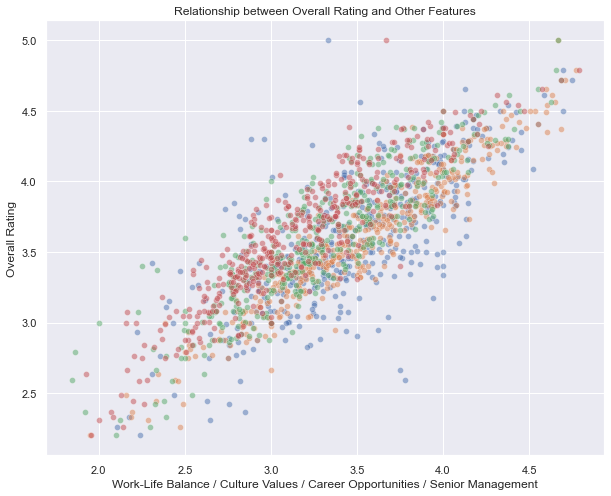

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='work_life_balance', y='overall_rating', data=df_grouped, alpha=0.5)
sns.scatterplot(x='culture_values', y='overall_rating', data=df_grouped, alpha=0.5)
sns.scatterplot(x='career_opp', y='overall_rating', data=df_grouped, alpha=0.5)
sns.scatterplot(x='senior_mgmt', y='overall_rating', data=df_grouped, alpha=0.5)

plt.xlabel('Work-Life Balance / Culture Values / Career Opportunities / Senior Management')
plt.ylabel('Overall Rating')
plt.title('Relationship between Overall Rating and Other Features')

plt.show()


In [15]:
unique_firm_names = df['firm'].unique().tolist()
unique_firm_names

['AFH-Wealth-Management',
 'AJ-Bell',
 'ALDI',
 'AQA',
 'ASDA',
 'ASOS',
 'AXA-UK',
 'Abcam',
 'Abertawe-Bro-Morgannwg-University-Health-Board',
 'Accenture',
 'Accor',
 'Achieving-for-Children',
 'ActionCOACH',
 'Active-Care-Group',
 'Adecco',
 'Age-UK-The-National-Charity',
 'AlixPartners',
 'American-Express',
 'Amey',
 'Angard-Staffing',
 'Anglian-Water',
 'Anglo-American',
 'Animal-and-Plant-Health-Agency',
 'Aon',
 'Apple',
 'Arcadia',
 'Arnold-Clark',
 'AstraZeneca',
 'Aviva',
 'B-and-M-Retail',
 'B-and-Q',
 'BAT',
 'BBC',
 'BDO',
 'BHS',
 'BIS',
 'BNP-Paribas',
 'BNY-Mellon',
 'BP',
 'BPP-Holdings',
 'BT',
 'Babcock-International-Group',
 'Babylon-Health',
 'Bain-and-Company',
 'Balfour-Beatty',
 'Bannatyne-Group',
 'Barchester-Healthcare',
 'Barclays',
 'Barnardo-s',
 'Barnet-and-Chase-Farm-Hospitals-NHS-Trust',
 'Barnett-Waddingham',
 'Barratt-Developments',
 'Barts-Health-NHS-Trust',
 'BayWa-r-e-renewable-energy',
 'Bayer',
 'Best-Western',
 'Betsi-Cadwaladr-University-Healt

In [16]:
companies=['Accenture','Apple','Deloitte','EY','Facebook','Goldman-Sachs','Google'
        ,'IBM','J-P-Morgan','LinkedIn','Mastercard','Microsoft',
        'Oracle','SAP','Tate','VMware','Vodafone','Wipro']

In [17]:
company_data=df[df['firm'].isin(companies)]

In [18]:
df = company_data.drop(columns=["headline", "pros", "cons"])
df

,firm,work_life_balance,culture_values,career_opp,senior_mgmt,overall_rating,review
7296,Accenture,1.000000,3.673788,3.000000,1.000000,3,big profits - poor people managementthe name a...
7297,Accenture,5.000000,3.673788,3.000000,2.000000,3,A good employer but not without challenges - o...
7298,Accenture,4.000000,3.673788,4.000000,4.000000,4,the grass is actually quite green on this side...
7299,Accenture,3.000000,3.673788,4.000000,4.000000,4,"A good company to work for, but dont expect a ..."
7300,Accenture,2.000000,3.673788,4.000000,4.000000,3,An okay place to be!The variety of work and cl...
...,...,...,...,...,...,...,...
831258,Wipro,5.000000,5.000000,5.000000,5.000000,5,NiceGood team work\r\nGood team workcons
831259,Wipro,4.000000,5.000000,5.000000,4.000000,4,Stable Organisation to work withIndian MNC wit...
831260,Wipro,1.000000,1.000000,1.000000,1.000000,1,No work life balanceFew good people that I wor...
831261,Wipro,2.883784,3.087571,3.165775,2.609164,3,Good onsite opportunity but management is not ...


In [19]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('gutenberg')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\SAJJAD-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to C:\Users\SAJJAD-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\SAJJAD-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
import re
df['review'] = df['review'].apply(lambda x: re.sub(r'[^\w\s]|\d+', '', x))

In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from nltk.tokenize import word_tokenize

In [22]:
df['label'] = np.where(df['overall_rating'] > 3, 1, 0)

In [23]:
def preprocessor(text):
    # Remove special characters, punctuation, and lowercase the text
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

In [24]:
df["review_processed"] = df["review"].apply(preprocessor)

In [25]:
df

,firm,work_life_balance,culture_values,career_opp,senior_mgmt,overall_rating,review,label,review_processed
7296,Accenture,1.000000,3.673788,3.000000,1.000000,3,big profits poor people managementthe name an...,0,big profits poor people managementthe name acc...
7297,Accenture,5.000000,3.673788,3.000000,2.000000,3,A good employer but not without challenges on...,0,good employer without challenges ongoing growi...
7298,Accenture,4.000000,3.673788,4.000000,4.000000,4,the grass is actually quite green on this side...,1,grass actually quite green side fencediversity...
7299,Accenture,3.000000,3.673788,4.000000,4.000000,4,A good company to work for but dont expect a l...,1,good company work dont expect lifedriven focus...
7300,Accenture,2.000000,3.673788,4.000000,4.000000,3,An okay place to beThe variety of work and cli...,0,okay place bethe variety work clients inspirin...
...,...,...,...,...,...,...,...,...,...
831258,Wipro,5.000000,5.000000,5.000000,5.000000,5,NiceGood team work\r\nGood team workcons,1,nicegood team work good team workcons
831259,Wipro,4.000000,5.000000,5.000000,4.000000,4,Stable Organisation to work withIndian MNC wit...,1,stable organisation work withindian mnc integr...
831260,Wipro,1.000000,1.000000,1.000000,1.000000,1,No work life balanceFew good people that I wor...,0,work life balancefew good people worked withcons
831261,Wipro,2.883784,3.087571,3.165775,2.609164,3,Good onsite opportunity but management is not ...,0,good onsite opportunity management goodgood on...


In [26]:
X = df['review_processed']
y = df['label']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [49]:
model = LogisticRegression(max_iter=100)
model.fit(X_train_vectorized, y_train)

C:\Users\SAJJAD-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [50]:
y_pred = model.predict(X_test_vectorized)

In [51]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7489264006342494


In [48]:
review = "bad good"  # The review text you want to check

# Preprocess the review text
review_vectorized = vectorizer.transform([review])

# Predict the sentiment using the trained model
sentiment = model.predict(review_vectorized)

print(sentiment)

[0]
